
**<center><font color='blue' size='+3'>Proceso KDD  de Ecuador</font></center>**



Los datos fueron obtenidos de la siguiente página web: https://www.ecuadorencifras.gob.ec/justicia-y-crimen/ en la opción: Denuncias de delitos de mayor incidencia.
Una vez descargada la información de subió el archivo con los datos a GitHub: https://github.com/JGeo20/TFM, con el siguiente nombre 122022_Tabulados Seguridad.xlsx



# KDD

Proceso de identificación de patrones y relaciones ocultas dentro de
los datos



El objetivo que persigue al realizar el proceso KDD es comparar los homicidios dolosos o intencionales registrados en Ecuador y México durante el periodo del 2015 al 2022 a través de métodos para la identificación de patrones.

## Selección de datos

Conexión con GitHub y carga

In [ ]:
import pandas as pd
url = 'https://github.com/JGeo20/TFM/raw/main/122022_Tabulados%20Seguridad.xlsx'
sheet_name = '1.- homicidios_absolutos'

# Read the Excel file into a DataFrame
df = pd.read_excel(url, sheet_name=sheet_name, engine='openpyxl',header=4)


In [ ]:
df.head()

,Unnamed: 0,Unnamed: 1,NACIONAL,Azuay,Bolívar,Cañar,Carchi,Cotopaxi,Chimborazo,El Oro,...,Pastaza,Pichincha,Tungurahua,Zamora Chinchipe,Galápagos,Sucumbíos,Orellana,Santo Domingo de los Tsáchilas,Santa Elena,Zona no delimitada
0,NaN,2014-01-01,151,3,1.0,1,3,3.0,2,11,...,0.0,10,0,0,0,6,6,5,0,0
1,NaN,2014-02-01,101,3,0.0,3,0,4.0,1,4,...,1.0,15,0,0,0,3,0,6,1,0
2,NaN,2014-03-01,129,3,1.0,2,0,0.0,0,6,...,0.0,14,0,0,0,2,1,13,2,0
3,NaN,2014-04-01,120,5,0.0,4,1,0.0,1,11,...,3.0,18,2,0,0,9,1,5,1,0
4,NaN,2014-05-01,107,3,0.0,1,1,3.0,1,6,...,0.0,23,2,0,0,2,2,2,1,0


In [ ]:
df.shape

(108, 28)

### Eliminación de columnas


In [ ]:
df = df.drop('NACIONAL', axis=1)
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
df.head()

,Unnamed: 1,Azuay,Bolívar,Cañar,Carchi,Cotopaxi,Chimborazo,El Oro,Esmeraldas,Guayas,...,Pastaza,Pichincha,Tungurahua,Zamora Chinchipe,Galápagos,Sucumbíos,Orellana,Santo Domingo de los Tsáchilas,Santa Elena,Zona no delimitada
0,2014-01-01,3,1.0,1,3,3.0,2,11,19,46,...,0.0,10,0,0,0,6,6,5,0,0
1,2014-02-01,3,0.0,3,0,4.0,1,4,8,26,...,1.0,15,0,0,0,3,0,6,1,0
2,2014-03-01,3,1.0,2,0,0.0,0,6,12,40,...,0.0,14,0,0,0,2,1,13,2,0
3,2014-04-01,5,0.0,4,1,0.0,1,11,8,30,...,3.0,18,2,0,0,9,1,5,1,0
4,2014-05-01,3,0.0,1,1,3.0,1,6,10,28,...,0.0,23,2,0,0,2,2,2,1,0


### Camabio de nombre y filtro de columnas

In [ ]:
df=df.rename(columns={'Unnamed: 1':'Fecha'})


In [ ]:
filtro = df['Fecha'].dt.year != 2014
df= df[filtro]

In [ ]:
df.head()

,Fecha,Azuay,Bolívar,Cañar,Carchi,Cotopaxi,Chimborazo,El Oro,Esmeraldas,Guayas,...,Pastaza,Pichincha,Tungurahua,Zamora Chinchipe,Galápagos,Sucumbíos,Orellana,Santo Domingo de los Tsáchilas,Santa Elena,Zona no delimitada
12,2015-01-01,1,2.0,1,3,3.0,2,3,12,21,...,3.0,11,1,0,0,1,0,2,2,3
13,2015-02-01,1,0.0,3,0,2.0,4,7,4,19,...,1.0,13,0,0,0,7,2,3,2,0
14,2015-03-01,3,2.0,0,2,1.0,1,10,10,34,...,0.0,13,1,1,0,8,1,4,2,0
15,2015-04-01,3,0.0,1,1,0.0,1,3,6,32,...,0.0,8,2,1,0,3,1,1,1,1
16,2015-05-01,3,0.0,0,1,1.0,2,5,9,34,...,0.0,12,1,0,0,1,2,3,2,0


In [ ]:
df.shape


(96, 26)

## Preprocesamiento de datos

Tipos de datos

In [ ]:
df.dtypes

Fecha                             datetime64[ns]
Azuay                                      int64
Bolívar                                  float64
Cañar                                      int64
Carchi                                     int64
Cotopaxi                                 float64
Chimborazo                                 int64
El Oro                                     int64
Esmeraldas                                 int64
Guayas                                     int64
Imbabura                                   int64
Loja                                       int64
Los Ríos                                   int64
Manabí                                     int64
Morona Santiago                            int64
Napo                                       int64
Pastaza                                  float64
Pichincha                                  int64
Tungurahua                                 int64
Zamora Chinchipe                           int64
Galápagos           

Todas los campos son de tipo entero a excepcion de Bolívar, Cotopaxi y Pastaza.

### Missing Values

In [ ]:
df.isnull().sum()

Fecha                             0
Azuay                             0
Bolívar                           4
Cañar                             0
Carchi                            0
Cotopaxi                          3
Chimborazo                        0
El Oro                            0
Esmeraldas                        0
Guayas                            0
Imbabura                          0
Loja                              0
Los Ríos                          0
Manabí                            0
Morona Santiago                   0
Napo                              0
Pastaza                           4
Pichincha                         0
Tungurahua                        0
Zamora Chinchipe                  0
Galápagos                         0
Sucumbíos                         0
Orellana                          0
Santo Domingo de los Tsáchilas    0
Santa Elena                       0
Zona no delimitada                0
dtype: int64

Existen valores faltantes

In [ ]:
df.shape

(96, 26)

Se rellena con ceros

In [ ]:
df1 = df.fillna(0)

se rellena con cero, debido a que cero se identifica como ausencia del delito en esa fecha.

In [ ]:
df1.isnull().sum()

Fecha                             0
Azuay                             0
Bolívar                           0
Cañar                             0
Carchi                            0
Cotopaxi                          0
Chimborazo                        0
El Oro                            0
Esmeraldas                        0
Guayas                            0
Imbabura                          0
Loja                              0
Los Ríos                          0
Manabí                            0
Morona Santiago                   0
Napo                              0
Pastaza                           0
Pichincha                         0
Tungurahua                        0
Zamora Chinchipe                  0
Galápagos                         0
Sucumbíos                         0
Orellana                          0
Santo Domingo de los Tsáchilas    0
Santa Elena                       0
Zona no delimitada                0
dtype: int64

In [ ]:
#se transforma todo a entero
col_num = df1.select_dtypes(include=['number']).columns
df1[col_num] = df1[col_num].astype(int)
df1.dtypes

Fecha                             datetime64[ns]
Azuay                                      int64
Bolívar                                    int64
Cañar                                      int64
Carchi                                     int64
Cotopaxi                                   int64
Chimborazo                                 int64
El Oro                                     int64
Esmeraldas                                 int64
Guayas                                     int64
Imbabura                                   int64
Loja                                       int64
Los Ríos                                   int64
Manabí                                     int64
Morona Santiago                            int64
Napo                                       int64
Pastaza                                    int64
Pichincha                                  int64
Tungurahua                                 int64
Zamora Chinchipe                           int64
Galápagos           

Se trasforma a entero porque son casos de conteos de homicidios intencionales.

### Duplicados

In [ ]:
duplicados= df1['Fecha'].duplicated().sum()
print(duplicados)

0


No existen duplicados

### Valores inconsistentes

valores negativos

In [ ]:
neg = df1.iloc[:, 1:].apply(lambda column: column[column < 0].sum()).sum()
neg

0

No existen números negativos

Fechas fuera de rango

In [ ]:
import pandas as pd
fecha_inicio = pd.to_datetime('2015-01-01')
fecha_fin = pd.to_datetime('2022-12-1')

fechas_fuera_de_rango = (df1['Fecha'] < fecha_inicio) | (df1['Fecha'] > fecha_fin)
cantidad_fechas_fuera_de_rango = fechas_fuera_de_rango.sum()

print(cantidad_fechas_fuera_de_rango)


0


No existen datos duplicados.

## Transformación de datos

### Estandarización de la base de datos

In [ ]:
import pandas as pd
d=df1.drop(['Fecha'],axis=1)
# Derretir el DataFrame original y seleccionar las columnas deseadas
melted = d.melt(var_name='Provincia', value_name='Num_casos')

# Ordenar el DataFrame resultante por la columna 'etiqueta'
melted = melted.sort_index(axis=1)

from itertools import repeat

# Repetir la columna A 5 veces
repeated_cols = []
for i in range(len(d.columns)):
    repeated_cols.append(df1['Fecha'])

# Concatenar las columnas repetidas en un nuevo DataFrame
rep = pd.concat(repeated_cols, axis=0)
rep=pd.DataFrame(rep).reset_index(drop=True)

In [ ]:
dat=pd.concat([rep,melted],axis=1)

In [ ]:
dat.head(10)

,Fecha,Num_casos,Provincia
0,2015-01-01,1,Azuay
1,2015-02-01,1,Azuay
2,2015-03-01,3,Azuay
3,2015-04-01,3,Azuay
4,2015-05-01,3,Azuay
5,2015-06-01,5,Azuay
6,2015-07-01,2,Azuay
7,2015-08-01,2,Azuay
8,2015-09-01,1,Azuay
9,2015-10-01,3,Azuay




```
# Tiene formato de código
```

### nuevas características

Año

In [ ]:
dat['Año'] = dat['Fecha'].dt.year
dat.head()

,Fecha,Num_casos,Provincia,Año
0,2015-01-01,1,Azuay,2015
1,2015-02-01,1,Azuay,2015
2,2015-03-01,3,Azuay,2015
3,2015-04-01,3,Azuay,2015
4,2015-05-01,3,Azuay,2015


Mes

In [ ]:
dat['Mes'] = dat['Fecha'].dt.month
nombres_meses = [ 'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
dat['Mes'] = dat['Mes'].map(lambda x: nombres_meses[x - 1])
dat.head()

,Fecha,Num_casos,Provincia,Año,Mes
0,2015-01-01,1,Azuay,2015,Enero
1,2015-02-01,1,Azuay,2015,Febrero
2,2015-03-01,3,Azuay,2015,Marzo
3,2015-04-01,3,Azuay,2015,Abril
4,2015-05-01,3,Azuay,2015,Mayo


### Selección de características

In [ ]:
sel=['Provincia','Año','Mes','Num_casos']
dat=dat[sel]
dat.head()

,Provincia,Año,Mes,Num_casos
0,Azuay,2015,Enero,1
1,Azuay,2015,Febrero,1
2,Azuay,2015,Marzo,3
3,Azuay,2015,Abril,3
4,Azuay,2015,Mayo,3


In [ ]:
dat.shape

(2400, 4)

## Minería de Datos


En la parte de minería de datos se ha optado por relizar aprendizaje no supervisado, específicamente clustering

### Mapa de calor por Provincia y Mes

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df_pivot = dat.pivot(index='Provincia', columns=['Año', 'Mes'], values='Num_casos')
df_pivot = df_pivot.groupby(level=1, axis=1).sum()
meses_ordenados = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
df_pivot = df_pivot.reindex(columns=meses_ordenados)


In [ ]:
df_pivot

Mes,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
Provincia,,,,,,,,,,,,
Azuay,23,57,21,52,34,25,20,25,14,25,22,17
Bolívar,7,7,6,7,5,3,2,3,7,5,9,13
Carchi,8,6,10,3,1,3,4,7,6,4,3,5
Cañar,14,15,19,9,16,14,3,29,21,14,13,8
Chimborazo,9,17,9,8,8,3,10,11,15,5,7,7
Cotopaxi,22,23,12,10,14,18,27,9,17,23,8,20
El Oro,63,80,67,55,70,86,59,75,69,68,77,87
Esmeraldas,63,93,91,91,101,91,90,91,118,102,97,100
Galápagos,0,0,0,1,1,0,0,0,0,0,0,0


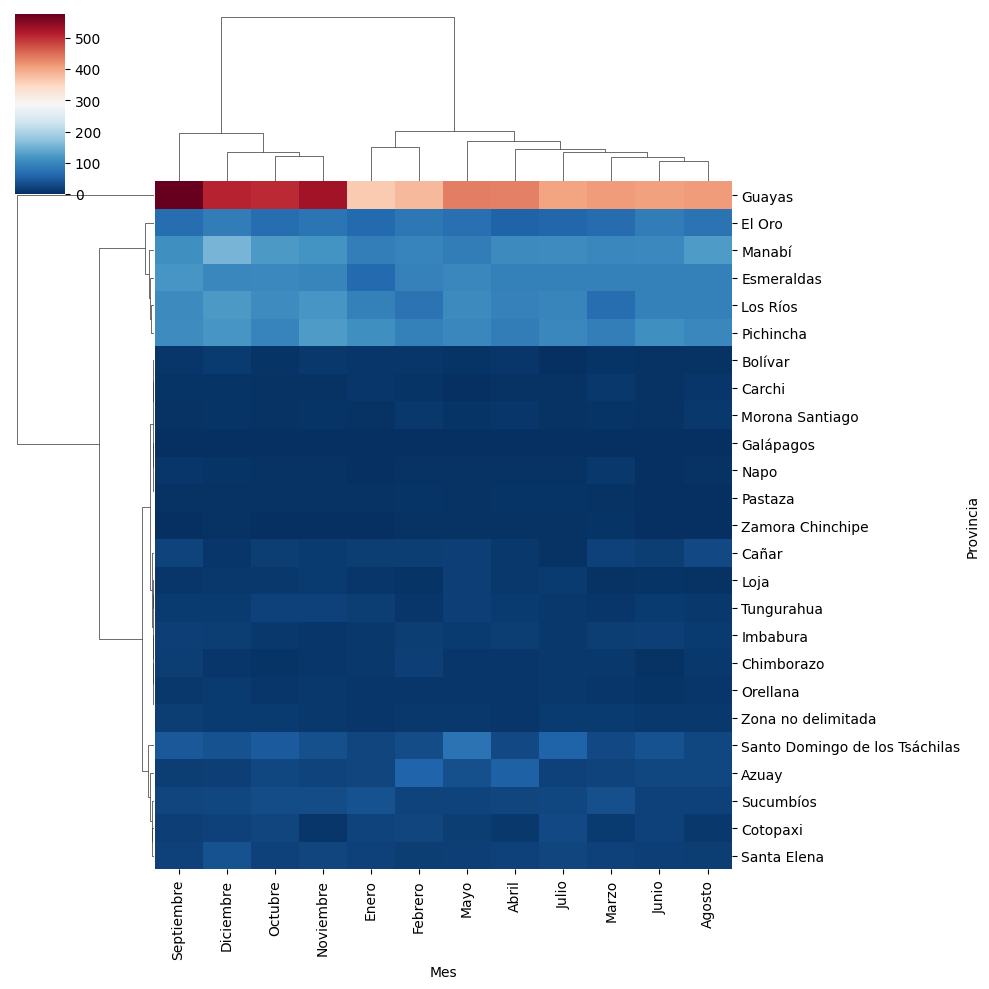

In [ ]:
# Crear el mapa de clústeres con las puntuaciones en cada recuadro
sns.clustermap(df_pivot, metric="euclidean", method="ward", cmap="RdBu_r")
plt.show()

## poner en Resultados


Clustering jerárquico de Provincias

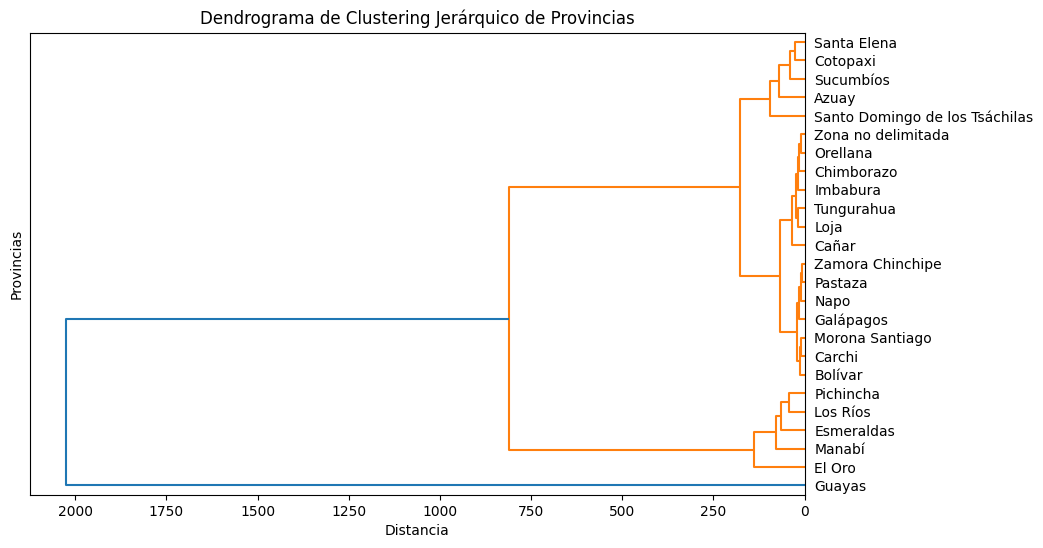

In [ ]:

import pandas as pd
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
distance_matrix = hierarchy.distance.pdist(df_pivot, metric='euclidean')

# Realizar el clustering jerárquico
linkage_matrix = hierarchy.linkage(distance_matrix, method='ward')

# Generar el dendrograma
plt.figure(figsize=(10, 6))
dendrogram = hierarchy.dendrogram(linkage_matrix, labels=df_pivot.index, orientation='left')

plt.title('Dendrograma de Clustering Jerárquico de Provincias')
plt.xlabel('Distancia')
plt.ylabel('Provincias')
plt.show()

### Mapa de calor por Provincia y año

In [ ]:
df_pivot = dat.pivot(index='Provincia', columns=['Mes', 'Año'], values='Num_casos')
df_pivot = df_pivot.groupby(level=1, axis=1).sum()

df_pivot

Año,2015,2016,2017,2018,2019,2020,2021,2022
Provincia,,,,,,,,
Azuay,28,35,44,38,24,33,59,74
Bolívar,6,9,7,12,9,12,7,12
Carchi,9,8,5,8,5,7,6,12
Cañar,11,6,8,4,6,17,41,82
Chimborazo,21,8,9,15,13,13,15,15
Cotopaxi,18,20,21,11,28,28,47,30
El Oro,63,62,56,54,87,95,146,293
Esmeraldas,93,74,63,79,67,79,151,522
Galápagos,0,0,1,0,0,1,0,0


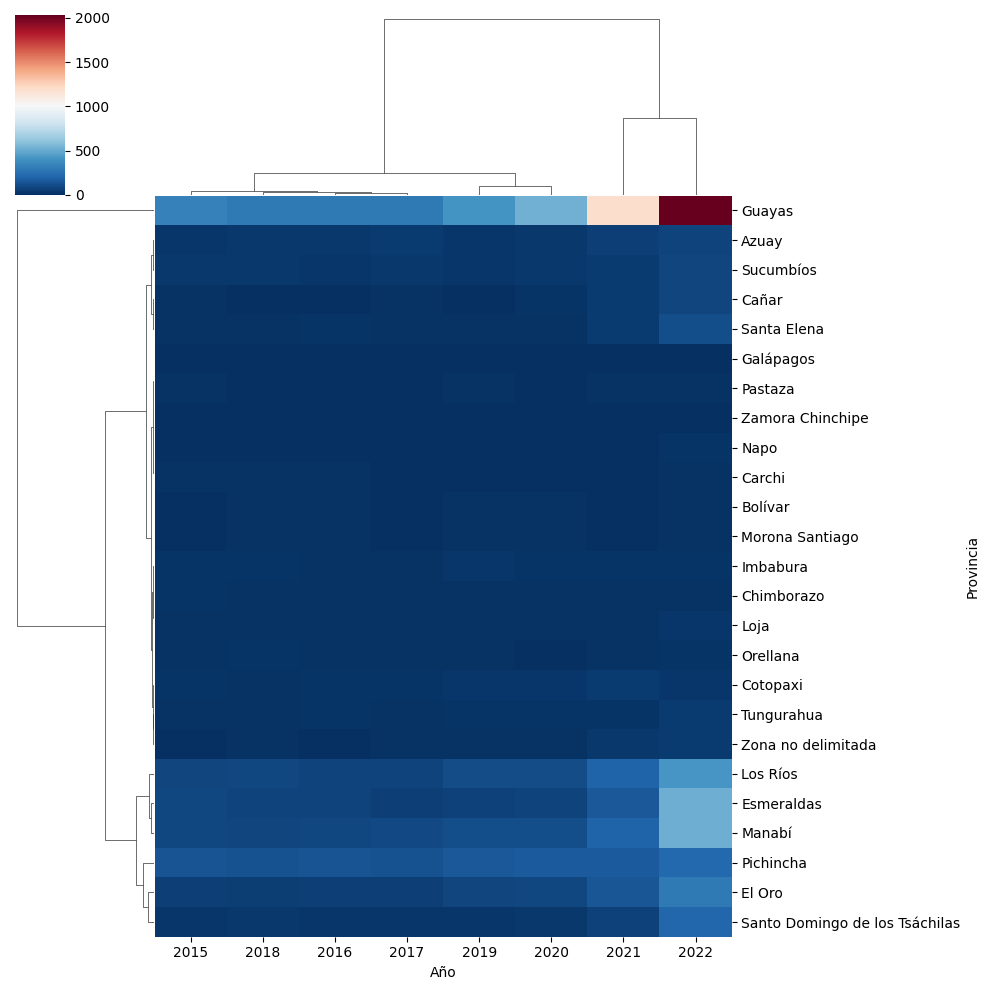

In [ ]:
# Crear el mapa de clústeres con las puntuaciones en cada recuadro
sns.clustermap(df_pivot, metric="euclidean", method="ward", cmap="RdBu_r")
plt.show()

## poner en Resultados

## Evaluación

Analizando el **mapa de calor de casos de homicidios por Provincia y Mes de Ecuador**, se observa tres grupos en la parte de provincias:

1. Provincia de Guayas.

2. El Oro, Manabí, Esmeraldas, Los Ríos y Pichincha.

3.  Bolívar, Carchi, Morona Santiago, Galápagos, Napo, Pastaza, Zamora Chinchipe, Cañar, Loja, Tungurahua, Imbabura, Chimborazo, Orellana, la zona no definida, Santo Domingo de los Tsáchilas, Azuay, Sucumbíos, Cotopaxi y Santa Elena.


 Se diferencian dos grupos en la parte de meses:

 1. septiembre, octubre, noviembre y diciembre
 2. enero, febrero, marzo, abril, mayo, junio, julio y agosto.



 **mapa de calor de casos de homicidios por Provincia y Año de Ecuador**

Se identificarón dis grupos distintos en los Años:
1. 2021 y 2022
2. 2015, 2016, 2017, 2018, 2019 y 2020

Se identificaron tres grupos distintos en cuanto a las provincias.
1. Guayas con el nivel más alto
2. Azuay, Sucumbíos, Cañar, Santa Elena, Galápa-gos, Pastaza, Zamora Chinchipe, Napo, Carchi, Bolívar, Morona Santiago, Imbab
3. Los Ríos, Esmeraldas, Manabí, Pichincha, El Oro y Santo Domingo de los Tsáchilas,

# **Gráficas**

In [ ]:
import plotly.express as px

# Supongamos que tienes los datos agrupados en df_grouped

df_grouped = dat.groupby('Año')['Num_casos'].sum().reset_index()

fig = px.line(df_grouped, x='Año', y='Num_casos', text='Num_casos')

# Personalizar los aspectos del gráfico para un aspecto profesional
fig.update_layout(
    title='Casos de Homicidios dolosos por Año',  # Título del gráfico
    xaxis_title='Año',                    # Título del eje x
    yaxis_title='Número de Casos',        # Título del eje y
    font=dict(family='Arial', size=16),   # Fuente y tamaño de fuente
    xaxis=dict(showgrid=True, gridwidth=0.5, showline=True),  # Eje x con rejilla y línea
    yaxis=dict(showgrid=True, gridwidth=0.5, showline=True),  # Eje y con rejilla y línea
    paper_bgcolor='rgba(0,0,0,0)',        # Fondo transparente del papel
    plot_bgcolor='rgba(0,0,0,0)',         # Fondo transparente del gráfico
    margin=dict(l=60, r=40, t=80, b=60),  # Márgenes para ajustar el diseño
)

# Añadir formato a las etiquetas
fig.update_traces(texttemplate='%{text:.f}', textposition='top center')

# Ajustar el estilo de las líneas y marcadores
fig.update_traces(line=dict(width=2, color='black'), marker=dict(size=6, color='darkblue'))

# Ajustar estilo de los ejes
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black')

fig.show()






In [ ]:
import pandas as pd
import plotly.express as px

# Supongamos que tienes los datos agrupados en df_grouped
df_grouped = dat.groupby('Mes')['Num_casos'].sum().reset_index()

# Ordenar el DataFrame por la columna 'Mes'
df_grouped['Mes'] = pd.Categorical(df_grouped['Mes'], categories=[
    'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
    'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'
], ordered=True)
df_grouped = df_grouped.sort_values('Mes')

fig = px.line(df_grouped, x='Mes', y='Num_casos', text='Num_casos')

# Personalizar los aspectos del gráfico para un aspecto profesional
fig.update_layout(
    title='Casos de Homicidios dolosos por Mes',  # Título del gráfico
    xaxis_title='Año',                    # Título del eje x
    yaxis_title='Número de Casos',        # Título del eje y
    font=dict(family='Arial', size=16),   # Fuente y tamaño de fuente
    xaxis=dict(showgrid=True, gridwidth=0.5, showline=True),  # Eje x con rejilla y línea
    yaxis=dict(showgrid=True, gridwidth=0.5, showline=True),  # Eje y con rejilla y línea
    paper_bgcolor='rgba(0,0,0,0)',        # Fondo transparente del papel
    plot_bgcolor='rgba(0,0,0,0)',         # Fondo transparente del gráfico
    margin=dict(l=60, r=40, t=80, b=60),  # Márgenes para ajustar el diseño
)

# Añadir formato a las etiquetas
fig.update_traces(texttemplate='%{text:.f}', textposition='top center')

# Ajustar el estilo de las líneas y marcadores
fig.update_traces(line=dict(width=2, color='black'), marker=dict(size=6, color='darkblue'))

# Ajustar estilo de los ejes
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black')

fig.show()


# Mapa de Ecuador

In [ ]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import folium
from geopy.geocoders import Nominatim
n=dat['Provincia'].unique()
# Crear un objeto geocoder
geolocator = Nominatim(user_agent="my_app")

mapa_ec = folium.Map(location=[-1.831239 ,-78.183406], zoom_start=5)

# Añadir nombres de estados al mapa
for estado in n:
    location = geolocator.geocode(estado + ', Ecuador')
    if location:
        folium.Marker([location.latitude, location.longitude], popup=estado).add_to(mapa_ec)

mapa_ec